## Aviation Accident Data Analysis

### Business Understanding
The company is expanding into the aviation industry and needs to identify the lowest-risk aircraft for purchase and operation. This analysis will help the company make data-driven decisions to minimize risks and ensure safety.

### Data Understanding
The dataset used is the **NTSB Aviation Accident Database**, which contains information about civil aviation accidents and incidents in the United States and international waters from 1962 to 2023. Key columns include:
- `Event.Date`: Date of the accident.
- `Injury.Severity`: Severity of injuries (e.g., Fatal, Serious, Minor).
- `Aircraft.damage`: Extent of damage to the aircraft.
- `Make`: Manufacturer and model of the aircraft.
- `Engine.Type`: Engine details.
- `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`: Injury statistics.
- `Weather.Condition` and `Broad.phase.of.flight`: Contextual details about the accident.


In [3]:
import os
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khsamaha/aviation-accident-database-synopses")

/Users/brianrono/anaconda3/envs/learn-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Find the CSV file inside the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, csv_files[csv_files.index('AviationData.csv')])  # Use the first CSV file found
df = pd.read_csv(csv_path, encoding='latin1')
df.head(5)

/var/folders/hk/9q5rgqm970gcnk6z0xvy1p7m0000gn/T/ipykernel_57801/3256873801.py:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.shape

(88889, 31)

In [6]:
# List of data's columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# Summary statistics of numeric columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
# The sum of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [9]:
# Drop irrelevant columns
df = df.drop(columns=['Event.Id', 'Accident.Number', 'Total.Uninjured', 'Location', 'Report.Status', 'Country', 'Latitude', 'Longitude', 'Publication.Date', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Schedule', 'Registration.Number', 'Amateur.Built', 'Purpose.of.flight', 'Air.carrier' ])

In [10]:
# Impute missing values

df['Injury.Severity'] = df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0])
df['Aircraft.damage'] = df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0])
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
df['Engine.Type'] = df['Engine.Type'].fillna(df['Engine.Type'].mode()[0])
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mode()[0])
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mode()[0])
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mode()[0])
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')

In [11]:
# Create new columns
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df['Risk.Score'] = (df['Total.Fatal.Injuries'] * 3) + (df['Total.Serious.Injuries'] * 2) + (df['Total.Minor.Injuries'] * 1)

In [12]:
# Filter data for commercial aviation focus
df_clean = df[df['Aircraft.Category'] == 'Airplane']

In [13]:
# Drop rows with missing critical data
df_clean = df_clean.dropna(subset=['Injury.Severity', 'Aircraft.damage', 'Make', 'Model'])

# Convert 'Event.Date' to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

# Check cleaned dataset
print("Cleaned Dataset Shape:", df_clean.shape)

Cleaned Dataset Shape: (27586, 16)


## Data Analysis

## Injury Severity by Aircraft Make

/var/folders/hk/9q5rgqm970gcnk6z0xvy1p7m0000gn/T/ipykernel_57801/3026956304.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=injury_by_make.head(30), x='Total.Fatal.Injuries', y='Make', palette='viridis')


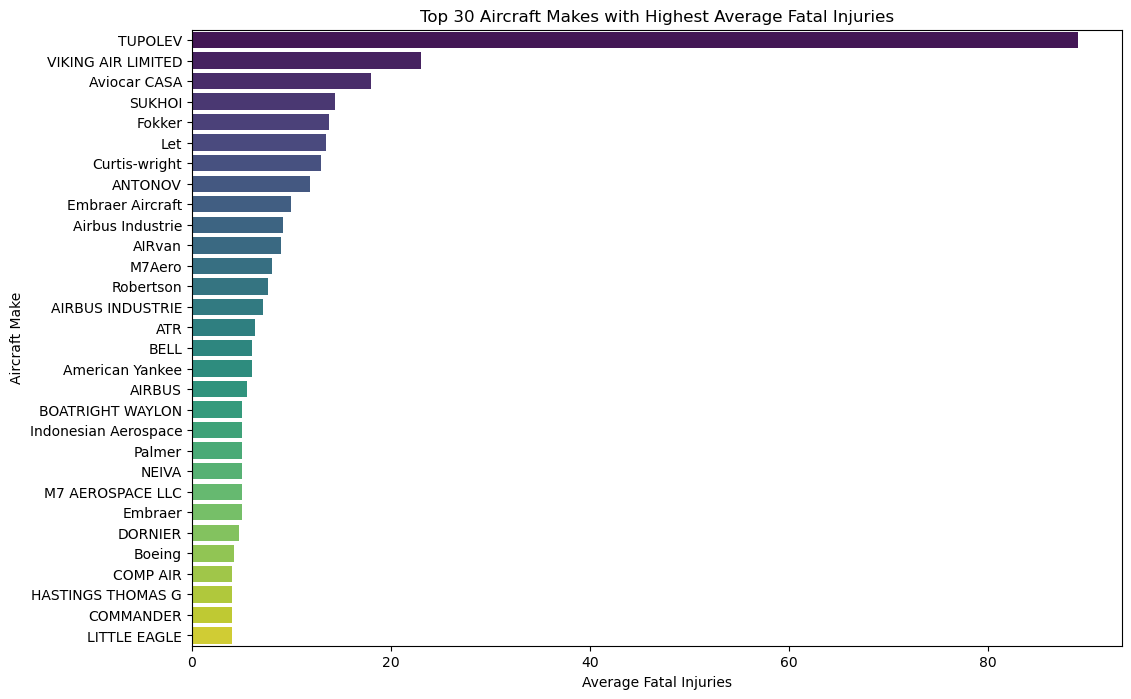

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group by 'Make' and calculate average injuries
injury_by_make = df_clean.groupby('Make').agg({
    'Total.Fatal.Injuries': 'mean',
    'Total.Serious.Injuries': 'mean',
    'Total.Minor.Injuries': 'mean'
}).reset_index()

# Sort by 'Total.Fatal.Injuries'
injury_by_make = injury_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=injury_by_make.head(30), x='Total.Fatal.Injuries', y='Make', palette='viridis')
plt.title('Top 30 Aircraft Makes with Highest Average Fatal Injuries')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Make')
plt.show()

## Aircraft Damage by Weather Condition

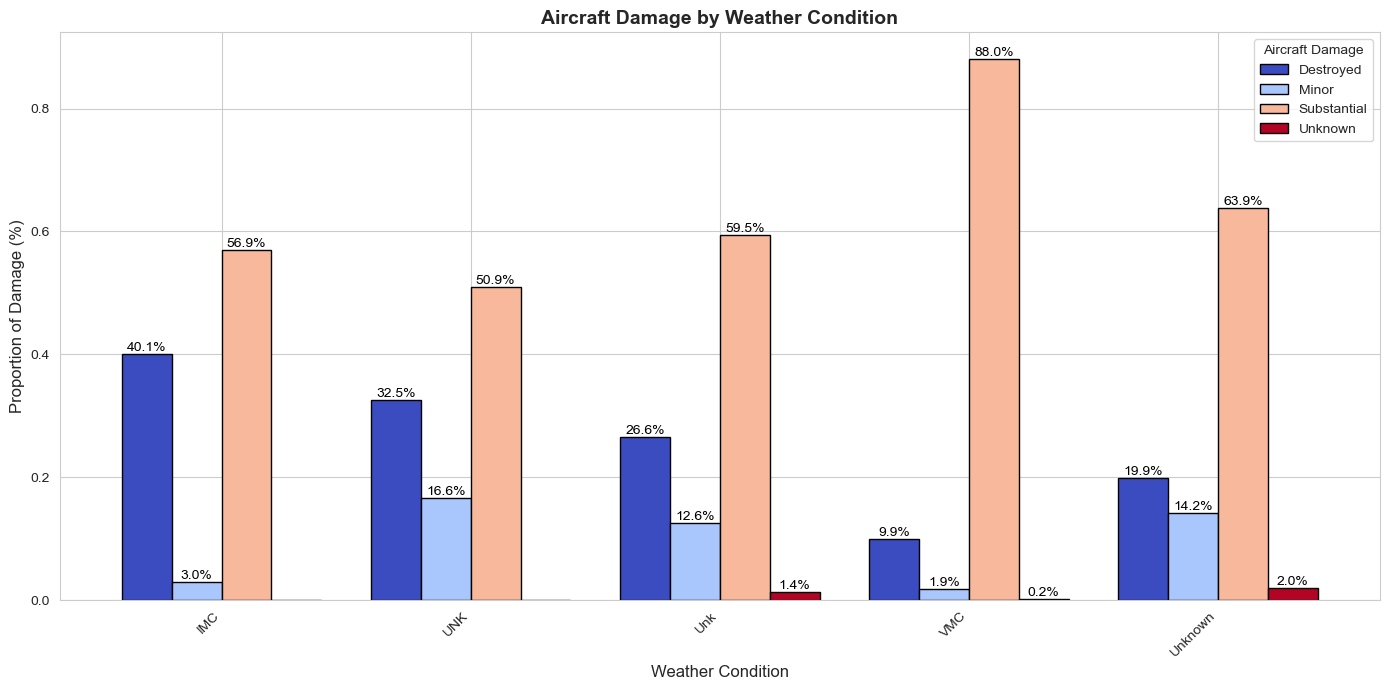

In [15]:
# Group by 'Weather.Condition' and calculate damage frequency
damage_by_weather = df_clean.groupby('Weather.Condition')['Aircraft.damage'].value_counts(normalize=True).unstack()


# Sort by total occurrences
damage_by_weather = damage_by_weather.reindex(damage_by_weather.sum(axis=1).sort_values(ascending=False).index)

# Set Seaborn style
sns.set_style("whitegrid")

# Create bar plot (grouped bars)
ax = damage_by_weather.plot(kind='bar', figsize=(14, 7), colormap='coolwarm', width=0.8, edgecolor='black')

# Add labels on top of bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Titles and labels
plt.title('Aircraft Damage by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Proportion of Damage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Aircraft Damage', fontsize=10)
plt.tight_layout()

# Show plot
plt.show()

 ## Fatal Injuries by Phase of Flight

/var/folders/hk/9q5rgqm970gcnk6z0xvy1p7m0000gn/T/ipykernel_57801/2248461279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fatal_by_phase, x='Total.Fatal.Injuries', y='Broad.phase.of.flight', palette='magma')


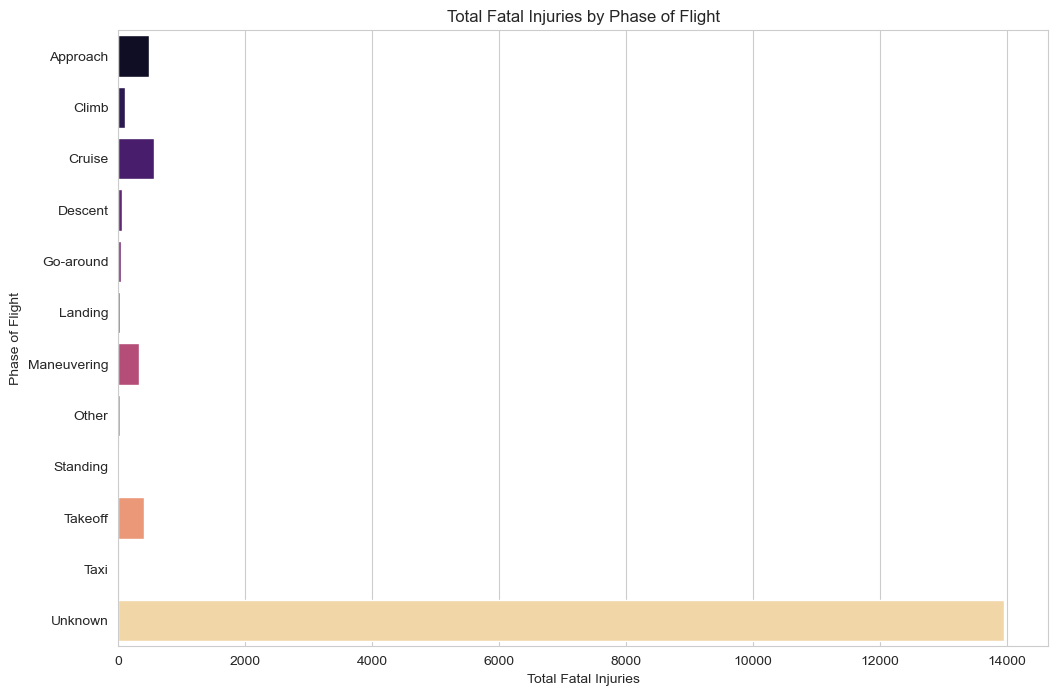

In [16]:
# Group by 'Broad.phase.of.flight' and calculate total fatal injuries
fatal_by_phase = df_clean.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=fatal_by_phase, x='Total.Fatal.Injuries', y='Broad.phase.of.flight', palette='magma')
plt.title('Total Fatal Injuries by Phase of Flight')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Phase of Flight')
plt.show()

## Accident Trends Over Time

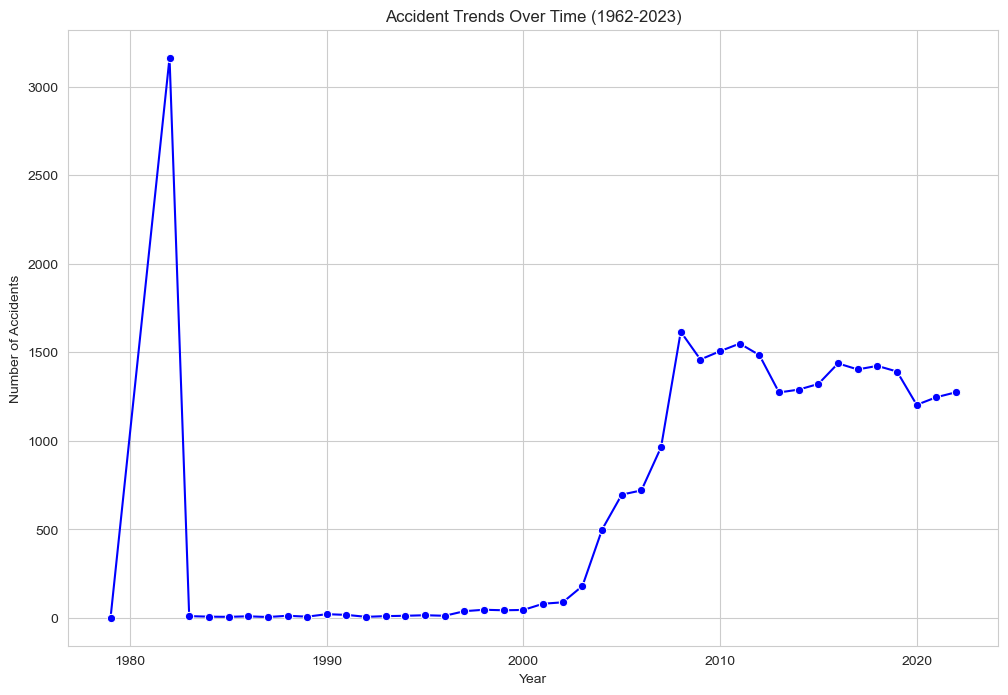

In [17]:
# Extract year from 'Event.Date'
df_clean['Year'] = df_clean['Event.Date'].dt.year

# Group by year and count accidents
accidents_by_year = df_clean.groupby('Year').size().reset_index(name='Accident.Count')

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=accidents_by_year, x='Year', y='Accident.Count', marker='o', color='blue')
plt.title('Accident Trends Over Time (1962-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

##  Engine Type vs. Fatal Injuries

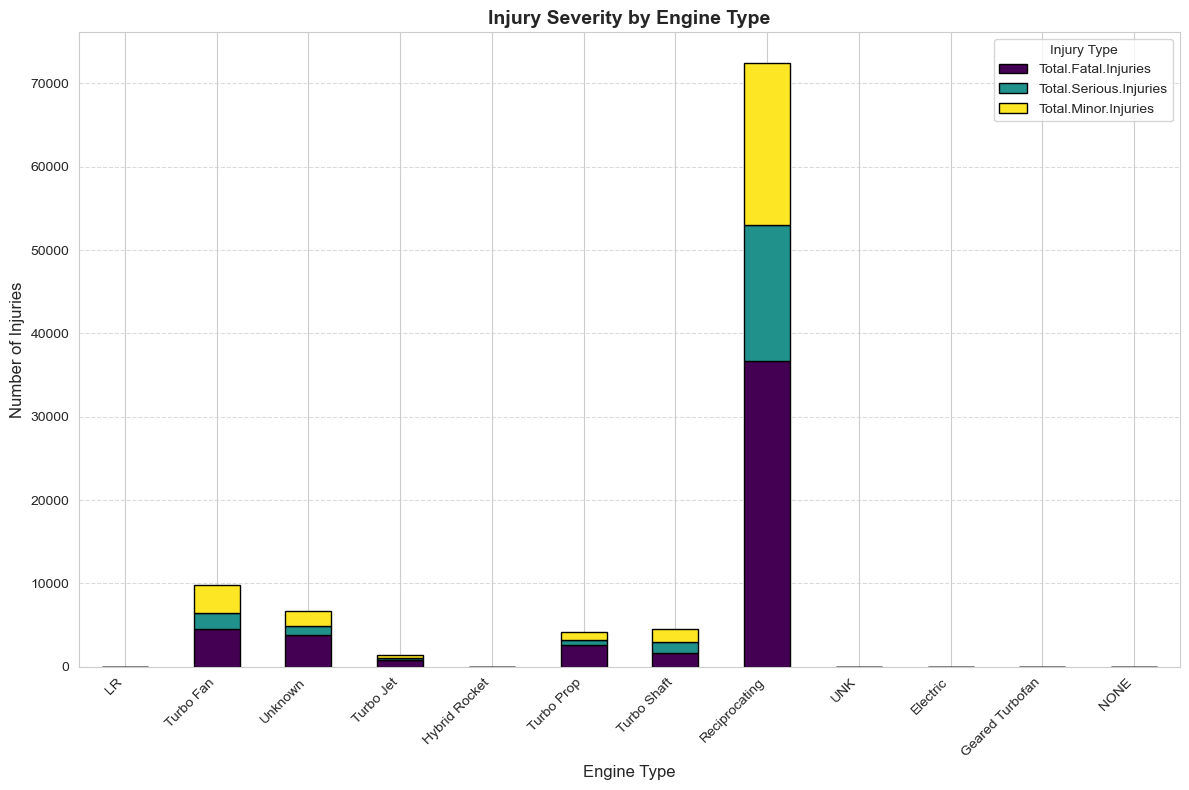

In [18]:
# Analyze Engine Type and Accident Severity
engine_analysis = df.groupby('Engine.Type').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Risk.Score': 'mean'
}).reset_index()

# Sort by Risk Score
engine_analysis = engine_analysis.sort_values(by='Risk.Score', ascending=False)

# Set index for stacking
engine_analysis.set_index('Engine.Type', inplace=True)

# Plot stacked bar chart
engine_analysis[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].plot(
    kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black'
)

# Titles and labels
plt.title('Injury Severity by Engine Type', fontsize=14, fontweight='bold')
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Injury Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Risk Score by Engine Type

In [19]:
import plotly.express as px

fig = px.bar(engine_analysis, x=engine_analysis.index, y='Risk.Score', title='Risk Score by Engine Type',
             labels={'Risk.Score': 'Risk Score', 'Engine.Type': 'Engine Type'},
             color='Risk.Score', height=500)
fig.show()


In [20]:
# %%
# Save cleaned data
df.to_csv('cleaned_data.csv', index=False)

## Recommendations
# Based on the analysis, here are three actionable recommendations:

1. **Avoid Purchasing aircraft models with the highest Fatal injuries** (e.g., Tupolev, Viking Air Limited and Aviocar CASA). Also focus on Engines with lower risk score as they have the fewest accidents and lowest injury rates. Such as Geared Tubofan engines and electric engine types.
2. **Prioritize aircraft with Geared turbofan engines** over reciprocating engines. Geared Turbofan engines have lower accident severity compared to reciprocating engines.
3. **Avoid operating aircraft in adverse weather conditions** (e.g., IMC). Accidents in poor weather are more likely to result in fatalities.
4. **Avoid High-Risk Phases of Flight**: Accidents during Takeoff and Landing phases result in higher fatal injuries. Implement additional safety measures during these phases.

## Conclusion
This analysis provides valuable insights into aviation safety, helping the company make informed decisions as it enters the aviation industry. The recommendations focus on minimizing risks and ensuring the safety of operations.